# Hough Transform

In [1]:
import cv2
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from math import pi, sin, cos
import time

%matplotlib inline

In [2]:
def plot_255img(img: np.array, title: str, size = [5,5]) -> None:
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.rcParams['figure.figsize'] = size
    plt.show()

def plot_rgbimg(img: np.array, title: str, size = [5,5]) -> None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.rcParams['figure.figsize'] = size
    plt.show()


### Line detection - Hough Tranform

<img src="Images/eq_3.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" 
        width="1200"
        height="400"/>



#### Gray scale image

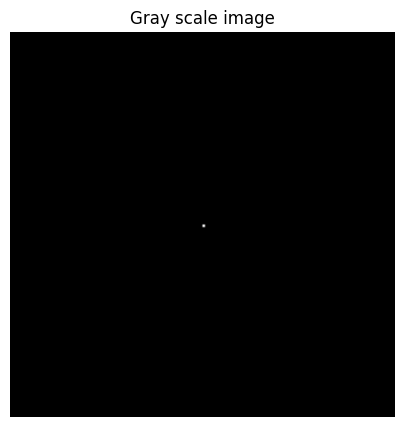

In [108]:
dir_path = "C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Features and Boundaries/Hough Transform/Images/"
im_name = "lane_line_1.png"

bgr_img = cv2.imread(dir_path+im_name )
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

img = np.zeros((150,150))
img[75, 75] = 1

plot_255img(img, "Gray scale image", [5,5])

#### Perform Edge Detection Algorithm and cleaning

In [49]:
blur =  cv2.GaussianBlur(img, ksize=(19,19), sigmaX=7.5)
edges = cv2.Canny(blur, 50, 80)

#Remove noise and non-desired lines
erode = cv2.erode(edges, kernel=np.ones((1, 3), np.uint8), iterations=0)
dilate = cv2.dilate(erode, kernel=np.ones((7, 7), np.uint8), iterations=0)
edges = dilate
plot_255img( np.concatenate((edges, erode, dilate),axis = 1), "Canny , erode and dilate"  , [20,20])

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


##### Hough Transform

In [123]:
f,c = img.shape
d = int(np.sqrt(f**2 + c**2))  #Max diatance is diagonal one 

num_degrees = 180

theta = np.deg2rad(np.arange(0, 180))
p_threshold = (-d,d)

rhos = np.array([])
thetas = np.array([])
plotting = []

H = np.zeros((int(2*d), len(theta)+1)) #Hough accumulator 


H_ = {}
#Non-zeros and sorted accumulator
H_ = sorted(H_.items(), key=lambda x:x[1], reverse=True)

In [135]:
non_zero_x, non_zero_y = np.nonzero(img)

for i in range(len(non_zero_x)):
    x = non_zero_x[i]
    y = non_zero_y[i]


    for k in range(len(theta)):
        r = int(-x * np.cos(theta[k]) + y * np.sin(theta[k]) )
        H[r + d, k] += 1
            

NameError: name 'h' is not defined

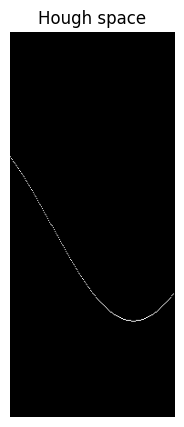

1

In [134]:
plot_255img(H,"Hough space", [5,5])
len(non_zero_x)

Filter for the Accumulator

In [80]:
strong_lines = [H_[0][0]]

for i in H_:
    theta,p = i[0]
    
    for j in strong_lines:
        if abs(theta - j[0]) > 45 and abs(p - j[1]) > 350 and [theta,p] not in strong_lines:
            strong_lines.append([theta,p])



(60, 1644)

Now, from Hough space, let's go back to image space

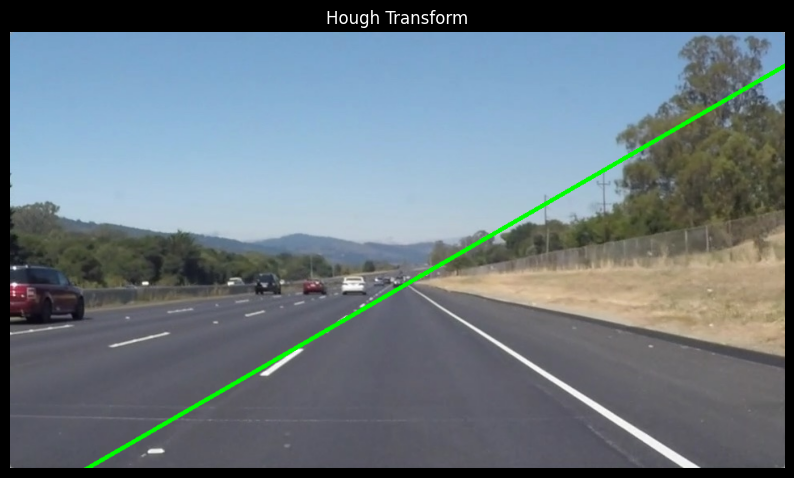

In [81]:
bgr_img = cv2.imread(dir_path+im_name )
#Obtain max points           
ind = np.argwhere(H > 20).astype('int16')


for i in strong_lines:
    theta,p = i

    a = cos(np.deg2rad(theta))
    b = sin(np.deg2rad(theta))


    X = (p-d)*a
    Y = (p-d)*b

    x1 = int(X + 1000*(-b))
    y1 = int(Y + 1000*(a))
    x2 = int(X - 1000*(-b))
    y2 = int(Y - 1000*(a))

    img_ = cv2.line(bgr_img,(x1,y1),(x2,y2),(0,255,0),3)   

plot_rgbimg(bgr_img, "Hough Transform", [10,15])



In [15]:
H.shape


(181, 2202)

In [106]:
def houghLine(image):
  ''' Basic Hough line transform that builds the accumulator array
  Input : image : edge image (canny)
  Output : accumulator : the accumulator of hough space
  thetas : values of theta (-90 : 90)
  rs : values of radius (-max distance : max distance)
  '''
  # Get image dimensions
  # y for rows and x for columns
  Ny = image.shape[0]
  Nx = image.shape[1]

  # Max diatance is diagonal one 
  Maxdist = int(np.round(np.sqrt(Nx**2 + Ny ** 2)))

  # Theta in range from -90 to 90 degrees
  thetas = np.deg2rad(np.arange(-90, 90))
  #Range of radius
  rs = np.linspace(-Maxdist, Maxdist, 2*Maxdist)
  accumulator = np.zeros((2 * Maxdist, len(thetas)))

  for y in range(Ny):
    for x in range(Nx):
      # Check if it is an edge pixel
      #  NB: y -> rows , x -> columns
      if image[y,x] > 0:
        # Map edge pixel to hough space
        for k in range(len(thetas)):
          # Calculate space parameter
          r = x*np.cos(thetas[k]) + y * np.sin(thetas[k])
          # Update the accumulator
          # N.B: r has value -max to max
          # map r to its idx 0 : 2*max
          accumulator[int(r) + Maxdist,k] += 1
  return accumulator, thetas, rs

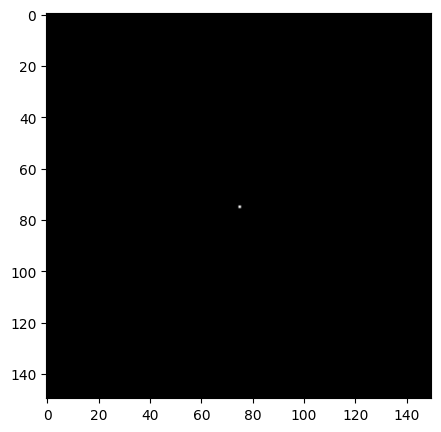

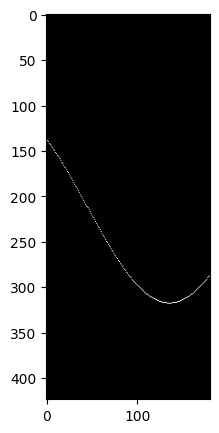

In [107]:
image = np.zeros((150,150))
image[75, 75] = 1
accumulator, thetas, rhos = houghLine(image)
plt.figure('Original Image')
plt.imshow(image)
plt.set_cmap('gray')
plt.figure('Hough Space')
plt.imshow(accumulator)
plt.set_cmap('gray')
plt.show()